In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx


n = 10
links = {
    0: [1, 2, 3, 4],
    1: [2, 0],
    2: [0],
    3: [4, 5, 6],
    4: [0],
    5: [0, 6],
    6: [0],
    7: [8, 9],
    8: [7, 9],
    9: [0]
}


def build_markov_matrix(links, n):
    M = np.zeros((n, n))
    for source in range(n):
        targets = links.get(source, [])
        if not targets:
            # dead-end
            M[:, source] = 1.0 / n
        else:
            for target in targets:
                M[target, source] = 1.0 / len(targets)
    return M

In [2]:
A = build_markov_matrix(links, n)
d = 0.85
x = np.array([1/n for _ in range(n)])
epsilon = 1e-8
E = np.ones((n, n)) / n
G = d * A + (1 - d) * E

for k in range(100):
    prev_x = x.copy()
    x = np.dot(G, x)
    x = x / np.sum(x)
    if np.linalg.norm(x - prev_x, ord=1) < epsilon:
        print(f"Converged at step {k+1}")
        break

print(f"Final Rankings for {n} nodes:\n{x}")

Converged at step 22
Final Rankings for 10 nodes:
[0.36959529 0.093539   0.13329307 0.093539   0.12004172 0.04150272
 0.05914137 0.02608696 0.02608696 0.03717391]


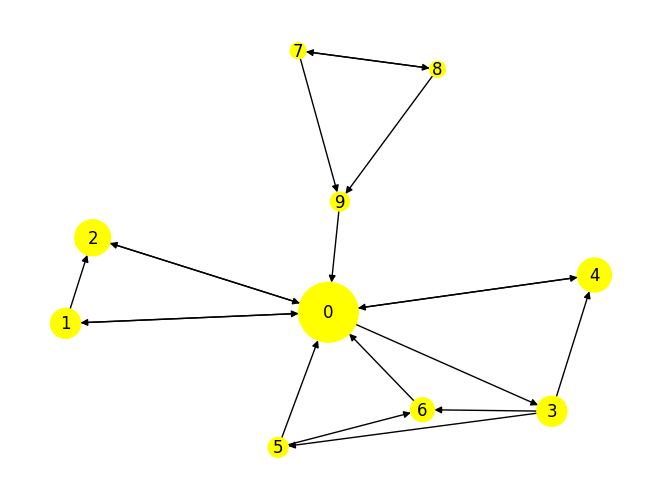

In [6]:
graph = nx.DiGraph(links)
nx.draw(
    graph,
    with_labels=True,
    node_color='yellow',
    node_size=x*5000,
)
plt.show()